In [1]:
!ls data/

hc_b10000_r0.005_HalfCheetah-v2_23-09-2018_16-29-31
hc_b10000_r0.01_HalfCheetah-v2_23-09-2018_16-36-03
hc_b10000_r0.02_HalfCheetah-v2_23-09-2018_16-48-32
hc_b128_r01_InvertedPendulum-v2_19-09-2018_13-29-32
hc_b30000_r0.005_HalfCheetah-v2_23-09-2018_16-55-01
hc_b30000_r0.01_HalfCheetah-v2_23-09-2018_17-13-57
hc_b32_r01_InvertedPendulum-v2_19-09-2018_13-26-47
hc_b32_r1_InvertedPendulum-v2_19-09-2018_13-28-39
hc_b64_r01_InvertedPendulum-v2_19-09-2018_13-30-22
hc_b80_r01_InvertedPendulum-v2_19-09-2018_13-32-03
hc_b88_r01_InvertedPendulum-v2_19-09-2018_13-32-42
hc_b96_r015_InvertedPendulum-v2_19-09-2018_13-34-12
hc_b96_r01_InvertedPendulum-v2_19-09-2018_13-31-00
hc_b96_r02_InvertedPendulum-v2_19-09-2018_13-33-45
lb_no_rtg_dna_CartPole-v0_18-09-2018_07-58-18
lb_rtg_dna_CartPole-v0_18-09-2018_08-00-49
lb_rtg_na_CartPole-v0_18-09-2018_08-04-52
ll_b40000_r0.005_LunarLanderContinuous-v2_19-09-2018_22-30-55
ll_b40000_r0.005_LunarLanderContinuous-v2_19-09-2018_22-35-50
ll_b40000_r0.005_LunarLander

In [2]:
%matplotlib inline

In [3]:
import os
import plot
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
data = []
for logdir in os.listdir('data/'):
    if 'CartPole-v0' in logdir:
        data += plot.get_datasets(os.path.join('data', logdir))
print(len(data))

18


/Users/zichen/venv3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/Users/zichen/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


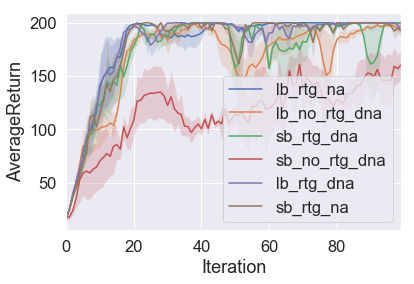

In [5]:
plot.plot_data(data, value="AverageReturn")

In [6]:
data = pd.concat(data, ignore_index=True)
print(data.shape)
data.head()

(1800, 14)


,LossBeforeUpdate,LossAfterUpdate,Time,Iteration,AverageReturn,StdReturn,MaxReturn,MinReturn,EpLenMean,EpLenStd,TimestepsThisBatch,TimestepsSoFar,Unit,Condition
0,95.066280,-235.629010,1.724725,0,19.168583,8.522807,51.0,9.0,19.168582,8.522807,5003,5003,0,lb_rtg_na
1,-30.026058,-171.601650,3.319590,1,27.320652,13.883067,88.0,9.0,27.320652,13.883068,5027,10030,0,lb_rtg_na
2,-60.189620,-158.643340,5.006497,2,35.631207,18.494165,101.0,9.0,35.631206,18.494167,5024,15054,0,lb_rtg_na
3,-40.607620,-88.283455,6.560128,3,45.518180,20.124940,101.0,13.0,45.518182,20.124942,5007,20061,0,lb_rtg_na
4,-6.765790,-25.192657,7.889117,4,51.773197,25.124641,154.0,19.0,51.773196,25.124640,5022,25083,0,lb_rtg_na


## 5.2 Experiments with Policy Gradient

**Problem 4. CartPole:**

```bash
# small batch runs:
python train_pg_f18.py CartPole-v0 -n 100 -b 1000 -e 3 -dna --exp_name
   sb_no_rtg_dna
python train_pg_f18.py CartPole-v0 -n 100 -b 1000 -e 3 -rtg -dna --exp_name
   sb_rtg_dna
python train_pg_f18.py CartPole-v0 -n 100 -b 1000 -e 3 -rtg --exp_name
   sb_rtg_na
   
```

/Users/zichen/venv3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/Users/zichen/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


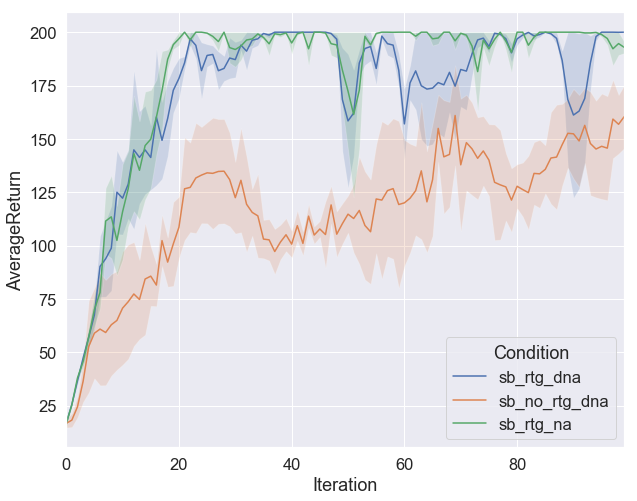

In [7]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.tsplot(data=data.loc[data.Condition.str.startswith('sb_')], 
                time="Iteration", value='AverageReturn', unit="Unit", condition="Condition",
               ax=ax)

```bash
# large batch runs:
python train_pg_f18.py CartPole-v0 -n 100 -b 5000 -e 3 -dna --exp_name
   lb_no_rtg_dna
python train_pg_f18.py CartPole-v0 -n 100 -b 5000 -e 3 -rtg -dna --exp_name
   lb_rtg_dna
python train_pg_f18.py CartPole-v0 -n 100 -b 5000 -e 3 -rtg --exp_name
   lb_rtg_na
```

/Users/zichen/venv3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/Users/zichen/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


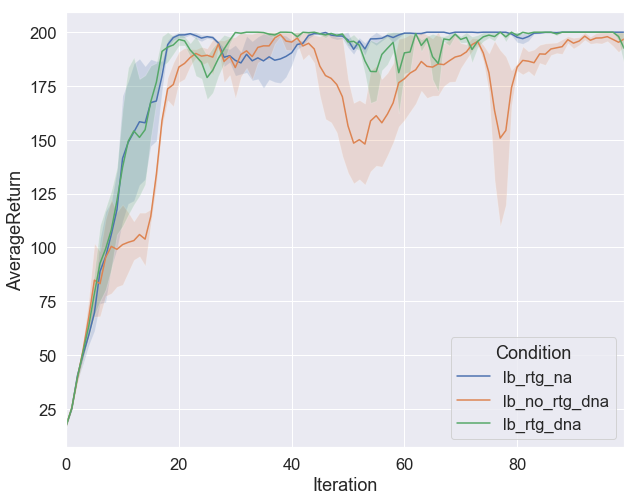

In [8]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.tsplot(data=data.loc[data.Condition.str.startswith('lb_')], 
                time="Iteration", value='AverageReturn', unit="Unit", condition="Condition",
               ax=ax)

- Which gradient estimator has better performance without advantage-centering— the trajectory-centric one, or the one using reward-to-go?

Reward-to-go (`-rtg`) has better performance because its low variance. 

- Did advantage centering help?

Yes, advantage centering reduce the variance for the training target of policy estimator. In the plots above it shows more stable average returns.

- Did the batch size make an impact?

Yes, larger batch sizes makes the policy gradient algorithms learn faster and more stably because of less randomness in the gradient.

**Problem 5. InvertedPendulum:**

```bash
python train_pg_f18.py InvertedPendulum-v2 -ep 1000 --discount 0.9 -n 100 -e 3 \
    -l 2 -s 64 -b <b*> -lr <r*> -rtg --exp_name hc_b<b*>_r<r*>
```
your task is to find the smallest batch size b* and largest learning rate r* that gets to optimum (maximum score of 1000) in less than 100 iterations. The policy performance may fluctuate around 1000 – this is fine. The precision of b* and r* need only be one significant digit.

- Attempted batch sizes: 32, 64, 80, 88, 96, 128
- Attempted learning rates: 0.01, 0.015, 0.2, 0.1

The smallest b* and largest r* to achieve optimum is 96 and 0.015

In [9]:
data = []
for logdir in os.listdir('data/'):
    if 'InvertedPendulum-v2' in logdir:
        data += plot.get_datasets(os.path.join('data', logdir))
print(len(data))

9


In [10]:
data = pd.concat(data, ignore_index=True)
print(data.shape)

(900, 14)


/Users/zichen/venv3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/Users/zichen/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


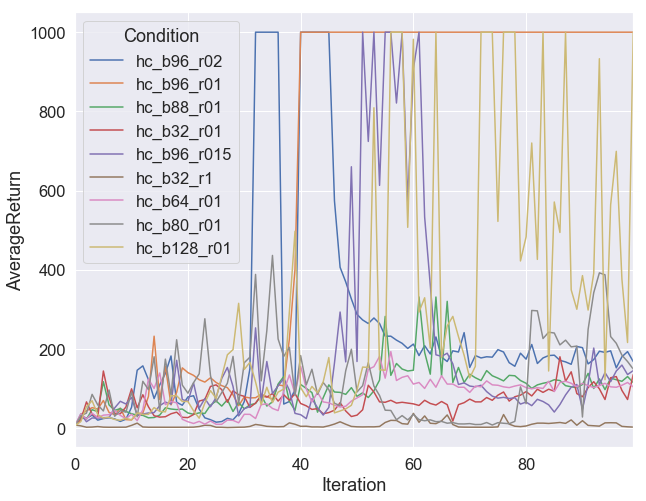

In [11]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.tsplot(data, 
                time="Iteration", value='AverageReturn', unit="Unit", condition="Condition",
               ax=ax)

**Problem 7: LunarLander**


In [17]:
data = plot.get_datasets('data/ll_b40000_r0.005_LunarLanderContinuous-v2_23-09-2018_17-35-17')
data = pd.concat(data, ignore_index=True)

/Users/zichen/venv3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/Users/zichen/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


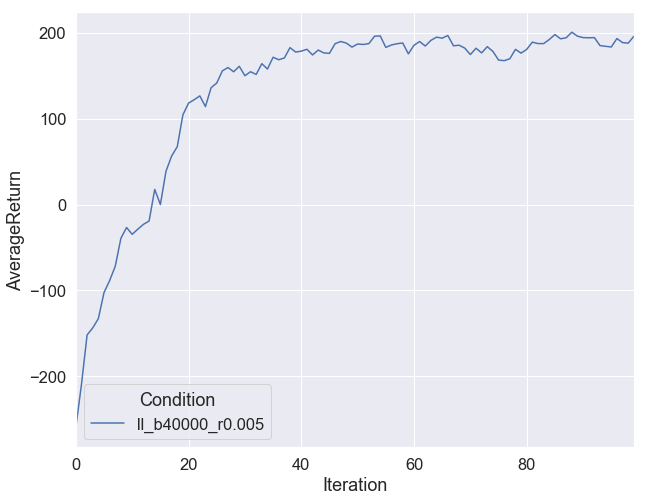

In [18]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.tsplot(data, 
                time="Iteration", value='AverageReturn', unit="Unit", condition="Condition",
               ax=ax)

**Problem 8: HalfCheetah**

- How did the batch size and learning rate affect the performance?

Run the following bash script to find the best combination of batch size and learning rate:
```bash
for b in 10000 30000 50000; do
	for r in 0.005 0.01 0.02; do
		echo $b, $r, "hc_b"$b"_r"$r
		python train_pg_f18.py HalfCheetah-v2 -ep 150 --discount 0.9 -n 100 -e 1 -l 2 \
			-s 32 -b $b -lr $r --exp_name "hc_b"$b"_r"$r
	done
done
```
Best b=50000, r=0.02

In [19]:
data = []
for logdir in os.listdir('data/'):
    if 'HalfCheetah-v2' in logdir:
        data += plot.get_datasets(os.path.join('data', logdir))
print(len(data))
data = pd.concat(data, ignore_index=True)

9


/Users/zichen/venv3/lib/python3.6/site-packages/seaborn/timeseries.py:183: UserWarning: The `tsplot` function is deprecated and will be removed in a future release. Please update your code to use the new `lineplot` function.
  warnings.warn(msg, UserWarning)
/Users/zichen/venv3/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


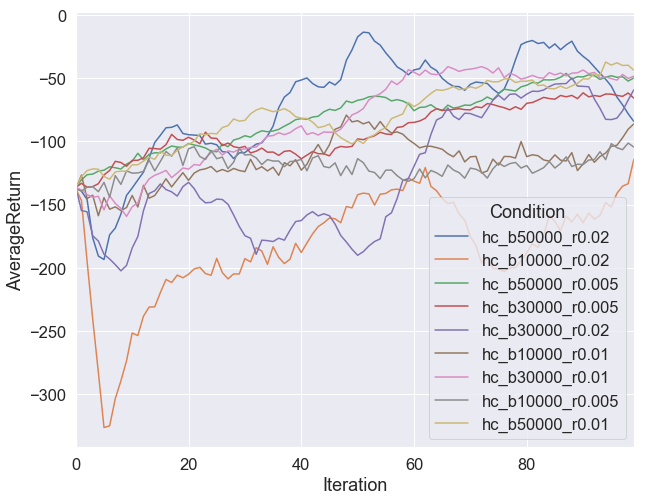

In [20]:
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.tsplot(data, 
                time="Iteration", value='AverageReturn', unit="Unit", condition="Condition",
               ax=ax)